In [1]:
# Loading Libraries
###### NOTE ##### Tensorflow in Google Colab is implemented
#--------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.optimizers
#--------------------------------
import numpy as np
#--------------------------------
import matplotlib.pyplot as plt
#--------------------------------
import os
import cv2
import glob
#--------------------------------
from skimage.transform import resize
import urllib.request
#--------------------------------
###### NOTE ##### If you use Colab
#--------------------------------
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
###### NOTE ##### If the data is packaged need to process.

In [3]:
# Data preprocessing
#--------------------------------
###### NOTE ##### Change PATH(base_dir) to your choice!
base_dir = r"C:\BRAINSTER\DATA\final_data"
#--------------------------------
# Data augmentation
#--------------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

###### NOTE ##### The validation data should not be augmented!
###### NOTE ##### Target size need to be set to Pretrained model.

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    subset='training',
    target_size=(224, 224),
    seed=0,
    batch_size=50,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    base_dir,
    subset='validation',
    target_size=(224, 224),
    seed=0,
    batch_size=50,
    class_mode='categorical')

Found 2000 images belonging to 5 classes.
Found 499 images belonging to 5 classes.


In [4]:
# Transfer Learning part, use MobileNet pretrained model
#--------------------------------

from tensorflow.keras.applications.mobilenet import MobileNet

base_mn = MobileNet(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3))

base_mn.trainable = False

In [5]:
# Model architecture
#--------------------------------
model_mn = models.Sequential()
#model_mn.add(layers.InputLayer(input_shape=(224,224,3)))
model_mn.add(base_mn)
model_mn.add(layers.Flatten())
model_mn.add(layers.Dense(256, activation='relu'))
model_mn.add(layers.Dense(5, activation='softmax'))

callback = ModelCheckpoint('model_mn.pt',
                            monitor='val_acc',
                            save_best_only = True,
                            mode='max',
                            verbose=2)
callback_list = [callback]

model_mn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [6]:
# Model fitting
#--------------------------------

history = model_mn.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2,
      callbacks=callback_list)

###### NOTE ##### WARNING!!!!!
# UserWarning: `Model.fit_generator` is deprecated and will be removed
#               in a future version. Please use `Model.fit`, which supports generators.
#--------------------------------
# WARNING:absl:Function `_wrapped_model` contains input name(s)
#         mobilenet_1.00_224_input with unsupported characters which
#         will be renamed to mobilenet_1_00_224_input in the SavedModel.

C:\Users\Dani Acer PC\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 - 38s - loss: 4.7117 - acc: 0.3930 - val_loss: 1.1364 - val_acc: 0.5230

Epoch 00001: val_acc improved from -inf to 0.52305, saving model to model_mn.pt


INFO:tensorflow:Assets written to: model_mn.pt\assets


INFO:tensorflow:Assets written to: model_mn.pt\assets


Epoch 2/10
20/20 - 36s - loss: 0.8618 - acc: 0.6500 - val_loss: 0.8236 - val_acc: 0.6573

Epoch 00002: val_acc improved from 0.52305 to 0.65731, saving model to model_mn.pt


INFO:tensorflow:Assets written to: model_mn.pt\assets


INFO:tensorflow:Assets written to: model_mn.pt\assets


Epoch 3/10
20/20 - 38s - loss: 0.7722 - acc: 0.7150 - val_loss: 1.0654 - val_acc: 0.5491

Epoch 00003: val_acc did not improve from 0.65731
Epoch 4/10
20/20 - 37s - loss: 0.5912 - acc: 0.7560 - val_loss: 0.5727 - val_acc: 0.7675

Epoch 00004: val_acc improved from 0.65731 to 0.76754, saving model to model_mn.pt


INFO:tensorflow:Assets written to: model_mn.pt\assets


INFO:tensorflow:Assets written to: model_mn.pt\assets


Epoch 5/10
20/20 - 39s - loss: 0.6440 - acc: 0.7530 - val_loss: 0.6339 - val_acc: 0.7375

Epoch 00005: val_acc did not improve from 0.76754
Epoch 6/10
20/20 - 39s - loss: 0.4972 - acc: 0.8230 - val_loss: 0.4252 - val_acc: 0.8457

Epoch 00006: val_acc improved from 0.76754 to 0.84569, saving model to model_mn.pt


INFO:tensorflow:Assets written to: model_mn.pt\assets


INFO:tensorflow:Assets written to: model_mn.pt\assets


Epoch 7/10
20/20 - 36s - loss: 0.4734 - acc: 0.8300 - val_loss: 0.4999 - val_acc: 0.8096

Epoch 00007: val_acc did not improve from 0.84569
Epoch 8/10
20/20 - 36s - loss: 0.4189 - acc: 0.8400 - val_loss: 0.5199 - val_acc: 0.8016

Epoch 00008: val_acc did not improve from 0.84569
Epoch 9/10
20/20 - 38s - loss: 0.3846 - acc: 0.8460 - val_loss: 0.6366 - val_acc: 0.7515

Epoch 00009: val_acc did not improve from 0.84569
Epoch 10/10
20/20 - 38s - loss: 0.3875 - acc: 0.8570 - val_loss: 0.3989 - val_acc: 0.8637

Epoch 00010: val_acc improved from 0.84569 to 0.86373, saving model to model_mn.pt


INFO:tensorflow:Assets written to: model_mn.pt\assets


INFO:tensorflow:Assets written to: model_mn.pt\assets


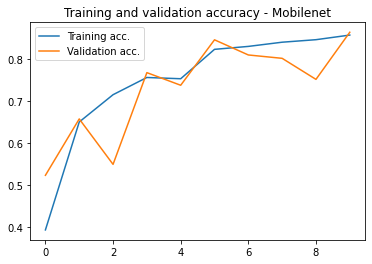

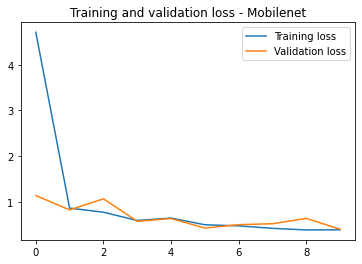

In [7]:
# Accuracy history
#--------------------------------
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc.')
plt.plot(epochs, val_acc, label='Validation acc.')
plt.title('Training and validation accuracy - Mobilenet')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss,label='Validation loss')
plt.title('Training and validation loss - Mobilenet')
plt.legend()

plt.show()

In [8]:
# Loading saved best model
#--------------------------------


#### MISSING

In [9]:
# #Import model, do not need to fit

# from keras.models import load_model

# model_mn.load_weights(r"C:\Users\Dani Acer PC\_Data_Science_Bootcamp\))) Final Project Working directory\FINAL-codes\from Sabina\model_mn.pt\saved_model.pb")


# # ValueError: Unable to load weights saved in HDF5 format into a
# #     subclassed Model which has not created its variables yet.
# #     Call the Model first, then load the weights.

In [10]:
# Classes added manually
#--------------------------------

classification = ['Indoor Selfie', 'Outdoor Selfie','Indoor Pose','Outdoor Pose','Photo Without Human']

------------------------------ 
PREDICTIONS:
------------------------------ 
Outdoor Pose : 99 %
Indoor Pose : 1 %
Photo Without Human : 0 %
Outdoor Selfie : 0 %
Indoor Selfie : 0 %
------------------------------ 


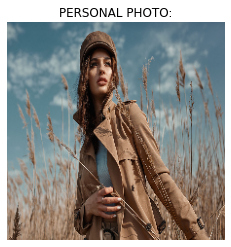

In [12]:
# Manually testing an image from URL
#--------------------------------
###### NOTE ##### Change URL to your choice!
#--------------------------------
def image_from_url(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_preprocessed  = cv2.resize(image, (224,224))
    return image_preprocessed

def show_pred_img(url):
    image_preprocessed = image_from_url(url)
    plt.axis("off") 
    plt.title("PERSONAL PHOTO:")
    img = plt.imshow(image_preprocessed)
    image_preprocessed = np.expand_dims(image_preprocessed, axis=0)/255
    predictions = model_mn.predict(image_preprocessed)
    class_index = [0,1,2,3,4]
    print("------------------------------ ")
    print("PREDICTIONS:")
    print("------------------------------ ")
    for i in range (5):
      for j in range (5):
        if predictions[0][class_index[i]] > predictions[0][class_index[j]]:
          temp = class_index[i]
          class_index[i] = class_index[j]
          class_index[j] = temp
    ###### NOTE #####  Print the predictions in order
    for i in range(5):
      print(classification[class_index[i]], ":", round( predictions[0][class_index[i]] * 100), "%")
    
    
    print("------------------------------ ")


------------------------------ 
PREDICTIONS:
------------------------------ 
Outdoor Selfie : 98 %
Photo Without Human : 2 %
Outdoor Pose : 0 %
Indoor Selfie : 0 %
Indoor Pose : 0 %
------------------------------ 


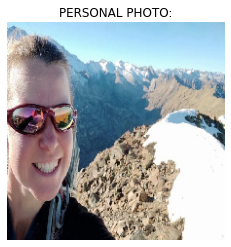

In [21]:
# Examples
#--------------------------------
### NOTE ### Simply remove comment or add as needed.
### NOTE ### If you test another one, would be nice to save here.
#--------------------------------

#Indoor Selfie testing
#--------------------------------
#show_pred_img("https://static.hub.91mobiles.com/wp-content/uploads/2016/08/Indoor-nexus-6p.jpg")
#show_pred_img("https://pics.me.me/selfie-time-i-feel-and-look-dead-inside-58141424.png")
#show_pred_img("https://cdn.shortpixel.ai/client2/q_lossy,ret_img,w_1000,h_642/https://www.pixinfocus.com/wp-content/uploads/2020/03/selfie-ideas-103.jpg")
#show_pred_img("https://i.pinimg.com/originals/7e/46/a5/7e46a58bc6df64fd396d0ac2fbc36715.jpg")

#Outdoor Selfie testing
#--------------------------------
#show_pred_img("https://ichef.bbci.co.uk/news/976/cpsprodpb/A260/production/_115686514_29f63140-028e-4e73-b6e2-cd50798531c5.jpg")

#Indoor Pose testing
#--------------------------------
#show_pred_img("https://image.freepik.com/free-photo/full-length-shot-gorgeous-dark-haired-lady-standing-confident-pose-indoor-portrait-pleased-red-haired-girl-pink-jacket-jeans_197531-11042.jpg")
#show_pred_img("https://thumbs.dreamstime.com/b/indoor-yoga-classes-sports-recreation-beautiful-young-woman-asana-pose-individual-nude-sportswear-portrait-sitting-168454477.jpg")

#Outdoor Pose testing
#--------------------------------
#show_pred_img("https://d25tv1xepz39hi.cloudfront.net/2021-03-02/files/03_-_SURROUNDINGS.jpg")

#Photo Without Human testing
#--------------------------------
#show_pred_img("https://s26162.pcdn.co/wp-content/uploads/2018/10/wharton_bedroom-1.jpg")

#Out of Curiosity
### NOTE ### Some interesting example, we could learn from.
#--------------------------------
#show_pred_img("https://test.neurohive.io/wp-content/uploads/2018/07/3D-pose-out-of-2D-image-e1531734971331.png")
